# Web Scraping

- What is web scraping?

the process of automatically extracting data from websites

In [1]:
# step 1.) get the BeautifulSoup and requests package library from bs4 module
from bs4 import BeautifulSoup
import requests

In [2]:
# step 2.) save the url in a variable
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [3]:
# step 3.) now use get() function to get data and store in a variable
table2 = requests.get(url)
table2

<Response [200]>

In [4]:
# step 4.) use beautifulsoup to display it
table2_text = BeautifulSoup(table2.text, 'html')

In [5]:
print(table2_text)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

In [6]:
# step 5.) now we need to get the table 

# find() function used to find the table element with a particular class, this will find the data of the table
# store the found table in a variable and specify the table number
# find_all will find the particular table from a no. of tables
# from html we find table with class, from tables we find a particular table

table2_text.find('table', class_ = 'wikitable sortable')
table = table2_text.find_all('table')[2]
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Profits<br/>(USD millions)
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple</a>
</td>
<td>Electronics
</td>
<td style="text-align:center;">96,995
</td></tr>
<tr>
<td>2
</td>
<td><a href="/wiki/Berkshire_Hathaway" title="Berkshire Hathaway">Berkshire Hathaway</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">96,223
</td></tr>
<tr>
<td>3
</td>
<td><a href="/wiki/Alphabet_Inc." title="Alphabet Inc.">Alphabet</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">73,795
</td></tr>
<tr>
<td>4
</td>
<td><a href="/wiki/Microsoft" title="Microsoft">Microsoft</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">72,361
</td></tr>
<tr>
<td>5
</td>
<td><a href="/wiki/JPMorgan_Chase" title="JPMorgan Chase">JPMorgan Chase</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">49,552
</td></tr>
<tr>
<td>6
</td>

In [7]:
# now we need only the headings and clear them up
# for this we use find all to find the th tags and store them in a variable
# remember we are finding this from our table now

col_titles = table.find_all('th')
col_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Profits<br/>(USD millions)
 </th>]

In [8]:
col_table_titles = [title.text.strip() for title in col_titles]
print(col_table_titles)

['Rank', 'Name', 'Industry', 'Profits(USD millions)']


In [9]:
# Store the data in a dataframe

import pandas as pd

In [10]:
df = pd.DataFrame(columns = col_table_titles)
df

,Rank,Name,Industry,Profits(USD millions)


In [11]:
col_data = table.find_all('tr')

In [12]:
for row in col_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #print(individual_row_data)
    
    length = len(df)
    df.loc[length] = individual_row_data

In [13]:
df

,Rank,Name,Industry,Profits(USD millions)
0,1,Apple,Electronics,"96,995"
1,2,Berkshire Hathaway,Conglomerate,"96,223"
2,3,Alphabet,Technology,"73,795"
3,4,Microsoft,Technology,"72,361"
4,5,JPMorgan Chase,Financials,"49,552"
5,6,Meta Platforms,Technology,"39,098"
6,7,ExxonMobil,Petroleum industry,"36,010"
7,8,Johnson & Johnson,Pharmaceutical industry,"35,153"
8,9,Amazon,Retail/Technology,"30,425"
9,10,Nvidia,Technology,"29,760"


In [15]:
df.to_csv(r'C:\Users\karam\Documents\Data Analysis\Python\Companies2.csv', index = False)

# Data Wrangling

In [21]:
df.size

40

In [22]:
df.shape

(10, 4)

In [23]:
df.describe()

,Rank,Name,Industry,Profits(USD millions)
count,10,10,10,10
unique,10,10,7,10
top,1,Apple,Technology,"96,995"
freq,1,1,4,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   10 non-null     object
 1   Name                   10 non-null     object
 2   Industry               10 non-null     object
 3   Profits(USD millions)  10 non-null     object
dtypes: object(4)
memory usage: 400.0+ bytes


In [32]:
df['Profits(USD millions)'] = df['Profits(USD millions)'].str.replace(',', '').astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   10 non-null     object
 1   Name                   10 non-null     object
 2   Industry               10 non-null     object
 3   Profits(USD millions)  10 non-null     int32 
dtypes: int32(1), object(3)
memory usage: 360.0+ bytes


# Visualize

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

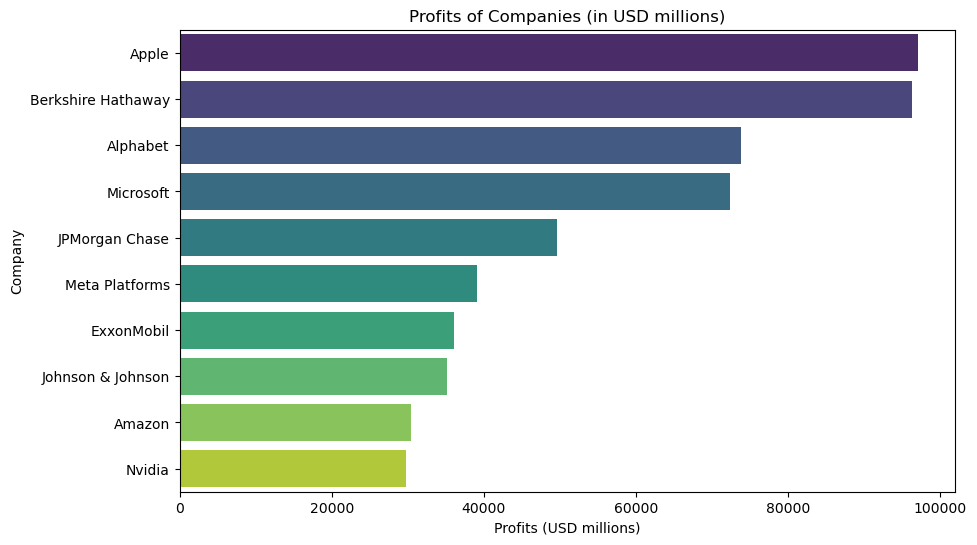

In [36]:
# 1. Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profits(USD millions)', y='Name', data=df, palette='viridis')
plt.title('Profits of Companies (in USD millions)')
plt.xlabel('Profits (USD millions)')
plt.ylabel('Company')
plt.show()

# Output interpretation

- Apple and Berkshire Hathaway lead in profits, each nearing $97,000 million, significantly outperforming other companies.

- Tech giants like Alphabet and Microsoft also show strong profitability, while Nvidia and Amazon have the lowest profits among the listed companies.

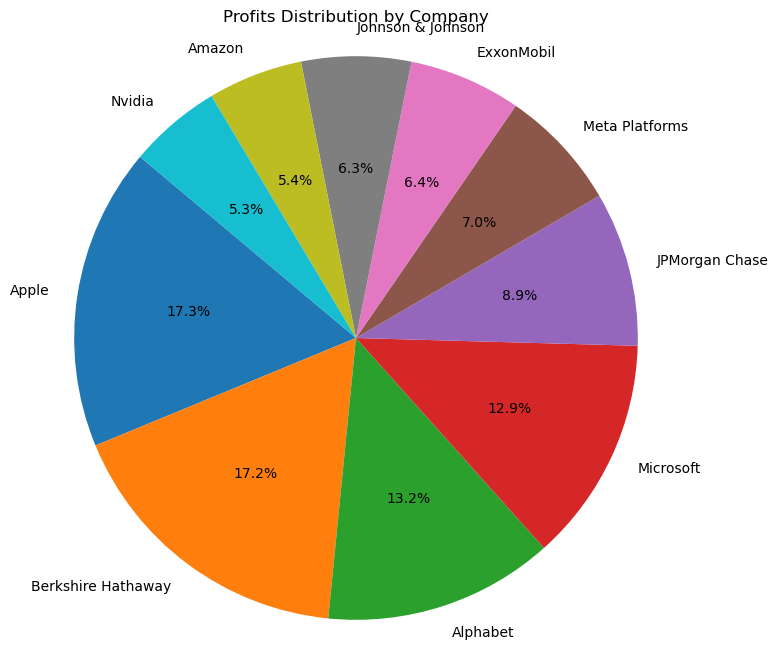

In [37]:
# 2. Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df['Profits(USD millions)'], labels=df['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Profits Distribution by Company')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Output interpretation

- Apple and Berkshire Hathaway together account for over 34% of total profits, dominating the distribution.

- Nvidia and Amazon contribute the least, each making up just over 5% of the overall profits.

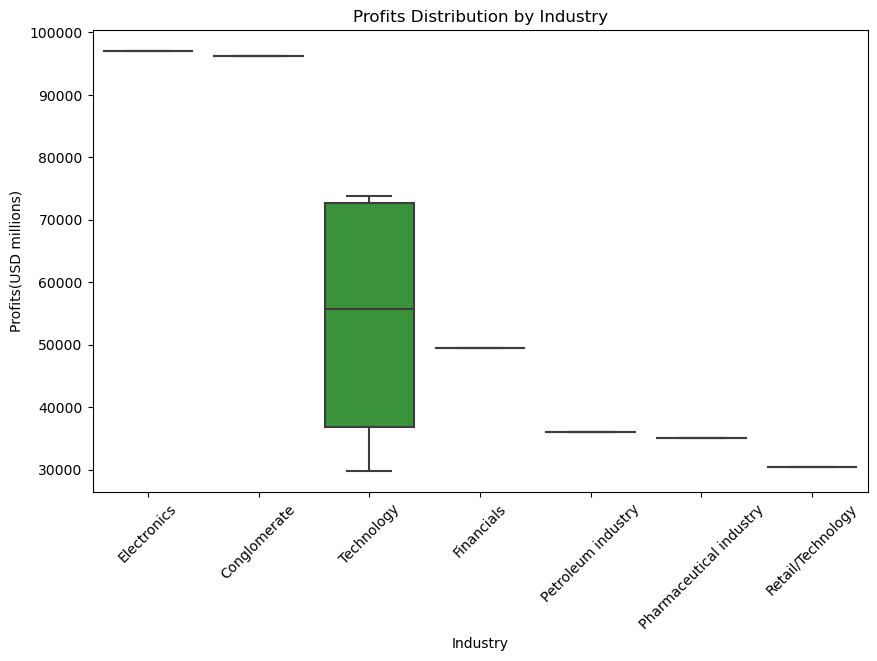

In [38]:
# 3. Box Plot (for visualizing profits distribution)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Profits(USD millions)', data=df)
plt.title('Profits Distribution by Industry')
plt.xticks(rotation=45)
plt.show()

# Output interpretation

- Technology industry shows high variability in profits, with companies ranging from $30,000M to $74,000M, indicating a diverse performance.

- Electronics and Conglomerate sectors have the highest profits but consist of only one top-performing company each, showing no variability.

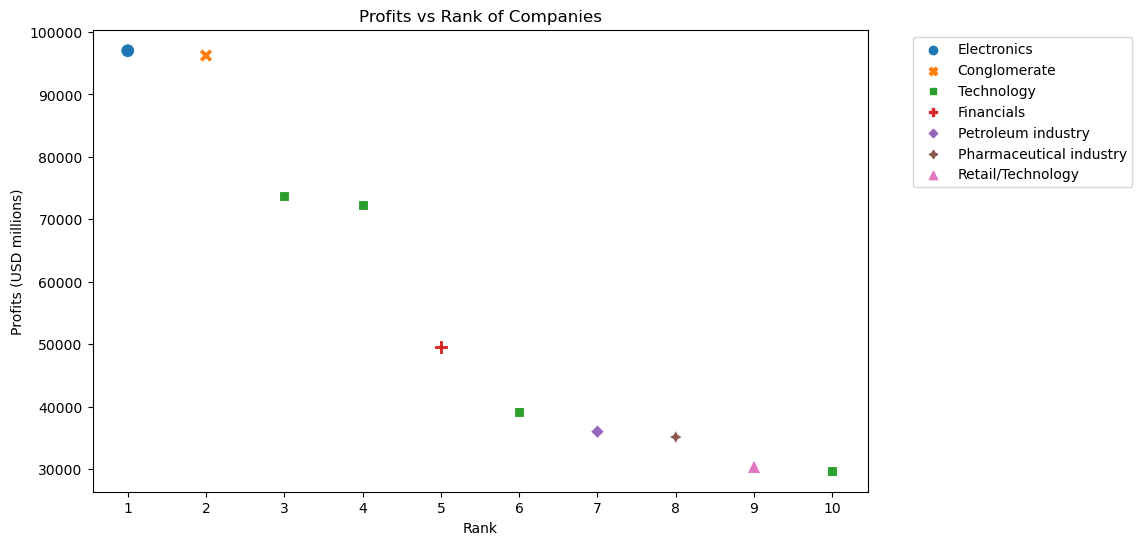

In [39]:
# 4. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Profits(USD millions)', hue='Industry', style='Industry', data=df, s=100)
plt.title('Profits vs Rank of Companies')
plt.xlabel('Rank')
plt.ylabel('Profits (USD millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Output interpretation

- Top-ranked companies in the Electronics and Conglomerate industries lead in profits, nearing $97,000 million.

- Technology companies are spread across mid to lower ranks, showing both high and moderate profit performances.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


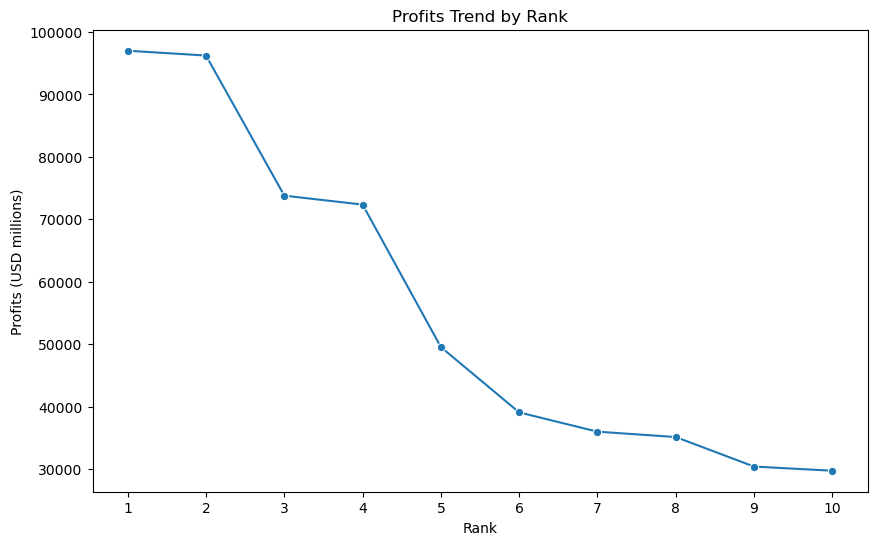

In [40]:
# 5. Line Plot (for visualizing profits trend)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Profits(USD millions)', marker='o', data=df)
plt.title('Profits Trend by Rank')
plt.xlabel('Rank')
plt.ylabel('Profits (USD millions)')
plt.xticks(df['Rank'])
plt.show()

# output interpretation

- Profits decline sharply from ranks 1 to 4, dropping from nearly 100,000 million USD to about 70,000 million USD.

- After rank 4, the profits continue to decrease but at a slower rate, stabilizing around 30,000 million USD by rank 10.